<a href="https://www.kaggle.com/code/micheldc55/tutorial-eda-para-data-science?scriptVersionId=113717156" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Configuración del entorno de trabajo

En este módulo veremos el análisis **exploratorio de los datos (EDA: en inglés Exploratory Data Analysis)**. Este proceso es el que utilizaremos para evaluar los datos que tenemos disponibles y generar un conocimiento general del comportamiento de las variables del problema.

Para hacer esto necesitamos hacer uso de los recursos que vimos en los dos módulos anteriores: [estadística](https://www.kaggle.com/code/micheldc55/introducci-n-a-estad-stica-para-data-science) y [visualización](https://www.kaggle.com/code/micheldc55/tutorial-data-science-matplotlib-y-seaborn). Utilizaremos la estadística para obtener medidas de tendencia central de los datos, aplicar transformaciones y verificar normalidad. Utilizaremos herramientas de visualización para poder el comportamiento global de los datos y complementar el análisis estadístico.

Por lo tanto, necesitamos instalar librerías de análisis de datos como **pandas** y **numpy**, y librerías de visualización (elegiremos **matplotlib** y **seaborn**). En este notebook utilizaremos el dataset de [iris](https://www.kaggle.com/datasets/arshid/iris-flower-dataset) de kaggle, otro dataset histórico en la ciencia de datos. Personalmente, es el que menos he utilizado y por eso quería hacer este análisis sin tener mucha información sobre el dataset para mostrar cómo se lleva a cabo este proceso realmente.

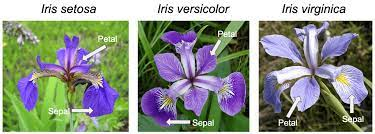

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introducción al Análisis Exploratorio

Es fundamental cargar, explorar y entender los datos, su calidad y su comportamiento **antes** de empezar a trabajar con ellos. Este proceso es necesario para tener una aproximación a los datos y debemos hacerlo antes de realizar cualquier análisis. Además, debemos conocer el comportamiento de los datos porque **muchas de las técnicas estadísticas de análisis de datos presuponen el cumplimiento de unas condiciones previas**, como **normalidad**, **no colinearidad** y **escalas comparables** para poder garantizar el funcionamiento correcto de las técnicas.

La definición formal de este análisis exploratorio de los datos es: el conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos.

## Por qué debemos utilizar el análisis exploratorio:

Identificar posibles errores (datos incorrectamente introducidos, detectar la ausencia de valores o una mala codificación de las variables revelar la presencia de valores atípicos (outliers) comprobar la relación entre variables (correlaciones) y su posible redundancia análisis descriptivo de los datos mediante representaciones gráficas y resúmenes de los aspectos más significativos. En mi opinión, [éste]() es un buen artículo sobre el análisis exploratorio, en caso de que quieran profundizar. En él, el autor cuenta que el objetivo del EDA se puede dividir en 6 principios (los he modificado un poco a mi criterio):

* **Maximizar el número de insights que obtenemos del dataset**
* **Descubrir la estructura y las relaciones entre los datos**
* **Extraer variables relevantes**
* **Detectar anomalías, valores duplicados y valores perdidos (missing values)**
* **Validar suposiciones o presuposiciones que podamos tener sobre los datos**
* **Determinar la relevancia de los datos y optimizar el input de nuestros modelos**

Un concepto importante aquí es que el EDA no es un proceso que sea exclusivo para el modelado para ciencia de datos. Las empresas, estudiantes e investigadores pueden sacar mucho provecho de entender sus datos y se tener un conocimiento práctico sobre como se comportan, antes de empezar a intentar extraer conclusiones o incluso modelar su comportamiento. El EDA es una pieza **fundamental en los procesos de ciencia de datos**. Siempre se espera que podamos realizar un análisis exploratorio antes de empezar a trabajar en un modelado. Muchas veces se habla de la regla del **80-20%** en el que el 80% del trabajo de un Data Scientist debería estar dedicado a obtener y entender los datos, y un 20% a tareas de modelado y tunning de modelos. En mi experiencia, esto es más un **90-10%**, pero eso dependerá de cada uno.

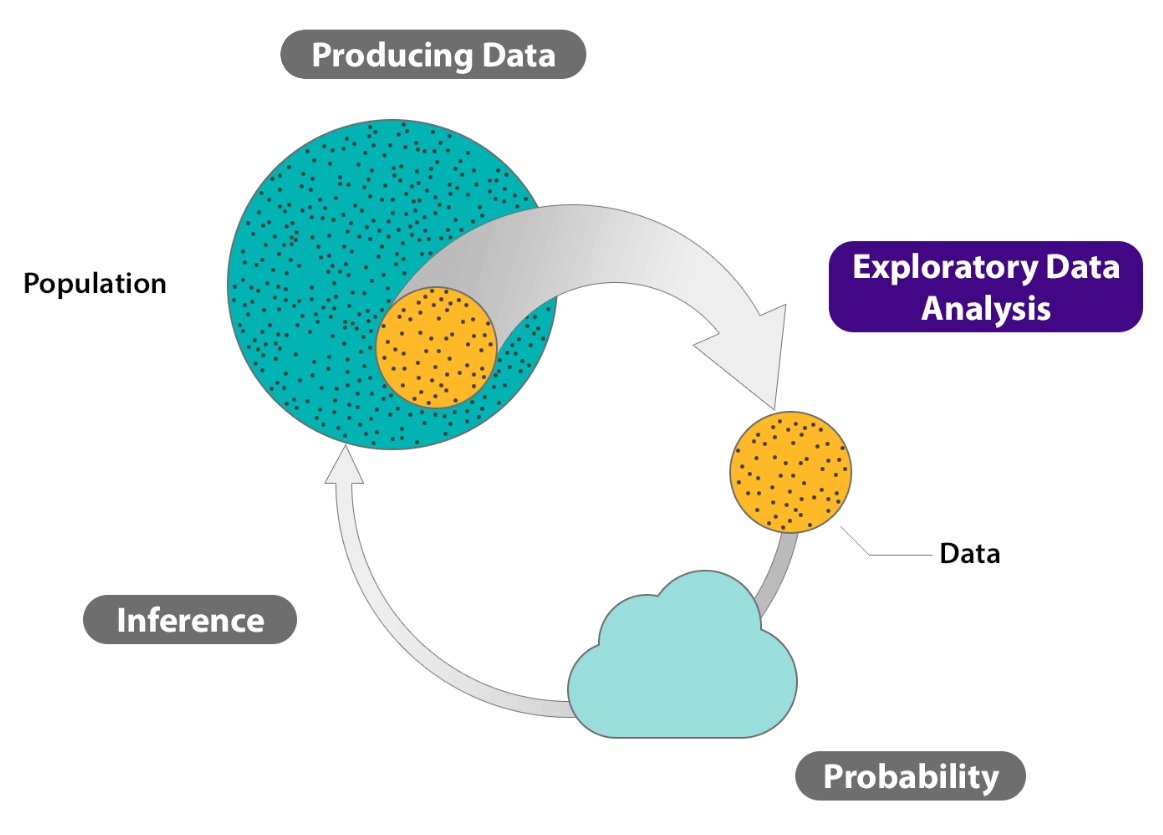

## Pasos del análisis exploratorio

Existen cientos de tutoriales y maneras de enfrentarnos a un análisis exploratorio. **Los pasos que se incluyen debajo están basados en mi experiencia personal**, pero deben **ajustarse un poco caso a caso** porque cada problema es distinto. Veremos que el análisis exploratorio se puede dividir en **3 grandes pasos**, pero estos pasos se subdividen en muchas tareas que debemos realizar para empezar a interpretar los resultados. Una **nota importante** sobre el EDA es que veremos primero limpieza de datos y luego visualización, pero es muy importante destacar que en la práctica veremos ambas a la vez, ya que muchas veces debemos visualizar los datos para identificar nulos o errores.

- **Carga de los datos:** Este paso parece trivial pero no lo es en la práctica, y lamentablemente es difícil verlo durante los ejercicios del curso, en el que simplemente tenemos que leer los datos. Acceder a los datos en la práctica generalmente supone conectarnos a una base de datos, a un datalake o plataforma cloud, o incluso compaginar datos de distintas fuentes. Es importante **no subestimar** este paso, ya que no siempre tendremos los datos a disposición. Hay algo muy importante, sobre todo cuando leemos un fichero de texto, y es lo que se conoce como **encoding**. Alguna vez has leído un fichero de Excel y obtuviste caracteres raros? Esto se debe a que el encoding que está utilizando Excel para leer el fichero no es el correcto. Esto, cuando tratamos con texto leido de ficheros de texto suele ser un problema.

- **Limpieza de datos:** La limpieza de datos se basa en obtener un dataset con el que podamos visualizar y finalmente modelar el problema. En este paso intentaremos eliminar duplicados (si corresponde), tratar valores nulos (si corresponde) y asegurarnos que los formatos y tipos de los datos sean los correctos. También he agregado un bonus para cuando tratamos con datos de tipo string que es el encoding. 

    - **Formatos y tipos:** Una de las primeras tareas que debemos verificar cuando nos enfrentamos a un dataset nuevo son los tipos de datos que tenemos. Podemos hacer esto con el método .info() o incluso con el método .dtypes sobre el DataFrame. Lo que queremos es familiarizarnos con los tipos de datos que tenemos, y también asegurarnos que el formato sea el correcto. En datasets geográficos por ejemplo, debemos verificar que las columnas de coordenadas estén en el formato correcto.
    - **Valores nulos:** Uno de los trabajos más importantes en el análisis exploratorio sucede con los valores nulos. Los valores nulos pueden suceder a causa de una mala recolección de datos, a causa de archivos que se han corrompido o pueden ser intencionales. Veremos que hay muchas maneras diferentes de solucionar el problema de los valores nulos, pero siempre debemos tener en cuenta que muchas veces estaremos fabricando información si elegimos imputarle un valor a estos valores, por lo que debemos ser cautos. El método [.isnull() o .isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) aplicado a las columnas de los DataFrames nos será muy útil en estos casos. Podemos hacer df[columna].isna().sum() para saber rápidamente cuantos elementos nulos tenemos por columna.
    - **Registros duplicados:** Los valores duplicados no siempre se tratan, pero pueden ser molestos de vez en cuando, aunque debemos estar seguros de su procedencia antes de determinar si quitarlos o no. Básicamente, el registro duplicado introduce un problema a los sistemas de ML que puede ser deseable o no, y es la magnificación de los errores. Si tenemos un registro repetido 10 veces y nuestro modelo se equivoca en su predicción, se estará equivocando 10 veces por un solo registro. Esto puede ser interesante en algunos casos, por ejemplo cuando hay pocos casos de la clase positiva muchas veces haremos "oversampling" para crear este mismo efecto en el modelo.
    
    
- **Visualización:** Esta es la etapa a la que la gente normalmente hace referencia con el EDA. A partir de este momento tenemos un dataset limpio y funcional. Ahora solo queda explorarlo, visualizar la distribución de las variables numéricas, explorar los recuentos de las variables categóricas, aplicar anàlisis estadísticos y transformaciones. Al final de este proceso deberíamos tener los datos listos para comenzar a modelar. Este proceso es el que tiene menos estructura, ya que a medida que comencemos a explorar los datos descubriremos nuevas avenidas para explorar y es difícil anticiparse a eso sin ver el dataset. Pero hay 4 tareas que prácticamente siempre haremos (y según tu grado de formalidad, hasta incluso 5):

    - **Split:** Esta es una tarea clave en cualquier modelo de Machine Learning que vayamos a construir. Los modelos de ML se entrenan con datos, si por ejemplo queremos entrenar un modelo de clasificación, nuestro modelo intentará crear una frontera de separación (que no tiene por qué ser lineal) entre las dos clases. Necesitamos que esta separación funcione bien con **cualquier tipo de dato** proveniente de la misma naturalez. 
    
    ¿Pero cómo garantizamos que el modelo funcione bien, y más imporatnte, que **generalice** bien? Lo que hacemos es dividir nuestros datos en datos de entrenamiento y datos de testing (incluso en datos de entrenamiento, validación y testing). Durante el entrenamiento del modelo, nos reservamos un conjunto de datos que el modelo no ve y luego evaluamos al modelo con ese conjunto de datos para ver si generaliza bien lo aprendido en el training.
    
    Por qué es importante hacer un split ahora? Porque queremos prevenir el **Data Leakage**, incluso en las visualizaciones para no sesgarnos hacia el recurso que utilizaremos para evaluar el modelo. Queremos que el modelo nunca reciba información sobre el conjunto de test. Debajo vemos una división típica en conjuntos de training, validación y test.
    
    - **Analisis univariante:** Debemos explorar todas las variables por sí mismas. Cómo se distribuyen? Cuales son relevantes? Hay alguna peculiaridad que se nos haya escapado durante los dos procesos anteriores? Si las variables son categóricas.. Cómo son los recuentos por categoría? Hay alguna categoría más frecuente que las demás? Alguna menos frecuente?
    - **Análisis bivariante:** Este paso agrega una dimensión más al problema. Ahora intentaremos Estudiar las relaciones de dependencia entre las variables de dos en dos. Algo importante a tener en cuenta es que siempre debemos intentar visualizar qué relación tienen nuestras variables con la variable que queremos predecir. También debemos buscar relaciones entre las demás variables para asegurarnos que no existan dependencias lineales entre ellas que puedan reducir el desempeño del modelo.
    - **Análisis multivariante:** En algunos casos, podemos intentar visualizar relaciones entre varias variables a la vez. Estos ya se vuelven más complejos de interpretar, pero en algunos casos pueden darnos información muy útil para resolver nuestro problema. Recordemos que nuestro objetivo en este paso es identificar aquel conjunto de variables que nos generará el mejor resultado de predictivo.
    - **Análisis de correlación:** En el análisis de correlación estudiaremos las relaciones de correlación entre las variables continuas. Si la variable que queremos predecir es continua, entonces nos interesa incluirla en el análisis y nos interesan particularmente las variables que correlan bien con nuestra variable objetivo. Si no, igualmente nos interesa la correlación para eliminar variables que tengan dependencia lineal entre ellas.
    
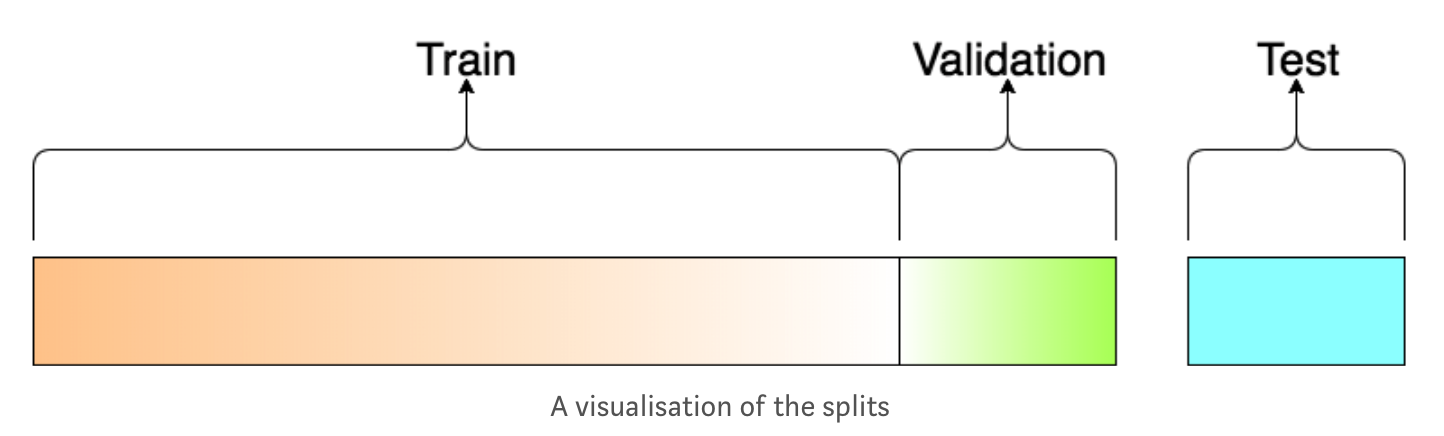
    
    
- **Otros análisis:** Aquí estudiaremos otros procesos que podrían ser interesantes para nuestro estudio, como pueden ser el feature engineering, la reducción de dimensionalidad y el data augmentation. En esta etapa también aplicaremos las transformaciones sobre los datos. Para verificar que las transformaciones han sido exitosas, podemos realizar tests estadísticos como los tests de normalidad.
    - **Feature engineering** es el proceso mediante el cual "fabricamos" variables nuevas a partir de los datos que tenemos. Por ejemplo, si tenemos una variable edad y queremos predecir el abandono de nuestros clientes, tal vez haciendo el análisis veamos que los clientes que abandonan en su mayoría son menores de 20 o mayores de 60. Por lo tanto en vez de tener la variable edad (numérica) podríamos convertirla en una categórica que fuera "menor de 20", "entre 20 y 60" y "mayor de 60". Probablemente este modelo sea incluso mejor que el otro, porque está capturando mejor el cambio en relación a la variable que queremos predecir.
    - La **reducción de la dimensionalidad** es el caso contrario al feature engineering. En ML debemos ser muy cautos con los extremos, no queremos tener variables irrelevantes (por eso utilizaremos feature engineering para perfeccionar su uso para predecir algo). Pero tampoco queremos tener tantas variables que nuestro modelo se pierda en la dimensionalidad del problema. Este problema es tan común que tiene un nombre: "The Curse of Dimensionality" (la maldición de la dimensionalidad). Si pensamos en los datasets como tablas, un problema de alta dimensionalidad es aquel que tiene muchas columnas. Una herramienta para solucionar ese problema es la reducción de la dimensionalidad. Básicamente buscaremos métodos estadísticos para convertir esas N variables en M, donde M << N.
    - El proceso de **data augmentation** es otra forma de feature engineering, en el que incorporamos más datos a nuestro dataset, ya sea incorporando nuevas variables (como pueden ser variables de clima) o modificando las variables que tenemos para enriquecer el dataset (esto generalmente se aplica en Deep Learning).
    - Las **transformaciones** serán otro de los pasos de este proceso. Como ya hemos mencionado, muchas veces queremos transformar nuestras variables a otra escala o convertir una distribución de cola pesada en una distribución más parecida a una normal. Podemos hacer ambos procesos utilizando transformaciones y reescalados, según corresponda. Para un repaso sobre esto, ver el notebook sobre [visualización en Python](https://www.kaggle.com/code/micheldc55/tutorial-data-science-matplotlib-y-seaborn)

# Análisis Exploratorio de los datos:

# 1) Importando los datos

Seguiremos los pasos que establecimos más arriba para ordenar nuestro análisis exploratorio. Comenzaremos importando los datos del directorio donde están almacenados. En este caso no hay variables de tipo texto, así que no debemos verificar el encoding. Sí es importante volver a señalar que el acceso a los datos en estos problemas es sencillo, pero en la práctica suele ser bastante trabajoso!

In [2]:
df = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2) Limpieza de Datos

Una vez que hemos cargado los datos y hemos verificado su integridad, pasamos a la limpieza. Ahora revisaremos el formato de los datos, los tipos de datos que tenemos, los valores nulos y haremos un comentario sobre los valores duplicados.

### 2.1) Tipos de datos

Ahora nos interesa familiarizarnos con los tipos de datos de nuestro dataset. Esto sucede por dos motivos, el primero es que nos interesa saber si estamos tratando con texto, valores numéricos, categóricos, números enteros, decimales, y sus medidas estadísticas centrales y de dispersión. Básicamente queremos un resumen matemático de alto nivel sobre los principales estadísticos de nuestro dataset.

Si utilizamos el método **.dtypes** sobre el DataFrame veremos que todos los valores de las columnas son numéricos, menos el de la clase que queremos predecir (llamado **species**) que es del tipo string. Pandas llama al tipo string como object, por eso veremos el valor object en la última línea.

In [3]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Cuando verificamos el tipo de datos, también suele ser útil verificar el tamaño del Dataset. El dataset es una tabla, por lo que tiene una cantidad de registros igual a la cantidad de filas y una cantidad de variables igual a la cantidad de columnas. El atributo .shape del DataFrame nos permite saber el tamaño del DataFrame. Lo devuelve como una tupla de la forma: ("número de filas", "número de columnas")

In [4]:
print(df.shape)
print(type(df.shape))

(150, 5)
<class 'tuple'>


In [5]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### No olvidar el split de los datos!

Ahora que sabemos la cantidad de datos que tenemos, haremos un split entre datos de entrenamiento y de validación. En los módulos siguientes hablaremos en más detalle de los conjuntos de validación y por qué debemos utilizarlos siempre, pero de momento lo improtante es recordar utilizarlos siempre. Veremos que hay muchas alternativas y variantes para dividir los datos, pero veremos que la librería scikit-learn ([sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) ya incluye una funcionalidad para dividir nuestros datos en train y test, que además ya nos devuelve el conjunto dividido en variables para modificar (las X) y variable para no modificar (la y).

Por qué hacerlo a esta altura y no al final? Porque queremos asegurarnos de no contaminar nuestro criterio. Queremos hacer este proceso con los datos con los que vamos a entrenar el modelo, como si quisiéramos ir descubriendo relaciones en el dataset con la misma información disponible que tendrá el modelo.

Ignoremos los argumentos que se le pasan a la función train_test_split de momento, los veremos más adelante.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['species'])

### 2.2) Valores nulos

Ahora queremos ver si el dataset tiene valores nulos y qué hacer con ellos en caso de que los tenga. Vemos que este dataset no tiene valores nulos con los métodos que se enseñan debajo, pero en caso de que te interese ver cómo podemos atacar valores nulos, al final del notebook hay algunas ideas de cómo se suelen tratar en la práctica, y algunas ideas para imputarlos, en caso de que quieras hacerlo.

In [8]:
# One way of checking nulls: the .info() method
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 63 to 130
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [9]:
# Another way: using the isna() method
for column in df_train.columns:
    num_nulls = df_train[column].isna().sum()
    print(f'Column "{column}" has {num_nulls} nulls')

Column "sepal_length" has 0 nulls
Column "sepal_width" has 0 nulls
Column "petal_length" has 0 nulls
Column "petal_width" has 0 nulls
Column "species" has 0 nulls


### 2.3) Valores duplicados

En este caso, los valores duplicados no nos interesan por **dos razones**. La primera es porque sabemos que el dataset no contiene valores duplicados que no deban tenerse en cuenta para el análisis. Esto en la práctica no lo sabríamos, pero como es un dataset clásico esta información es conocida. La segunda es que si miramos el tamaño de nuestro dataset, tenemos solamente 150 registros, por lo que si eliminamos duplicados corremos el riesgo de no poder realizar un análisis suficiente de los datos.

Igualmente, como algunos se preguntarán cómo podríamos atacar esta parte del EDA, lo mostraremos debajo a pesar de que no se realizarán cambios reales sobre el DataFrame.

Primero buscaremos los valores repetidos en el dataframe. Esto podemos hacerlo con el método **.duplicated()**. Este método devuelve una serie de True/False que tiene True en la posición donde hay un duplicado y False en la posición donde no la hay. Si le pasamos eso al DataFrame original, es como si estuvieramos filtrando por los valores que están duplicados.

Una observación es que el método duplicated por defecto borra el primer elemento repetido, pero como nos interesa ver todos los elementos, le pasamos el argumento "keep" como False, lo que significa que queremos ver todos los valores repetidos.

In [10]:
df_train[df_train.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica


Si quisieramos eliminar estos registros duplicados, podemos utilizar el método drop_duplicates, que elimina todas las apariciones de duplicados en el dataset, menos la primera (esto se puede cambiar).

In [11]:
df_train.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
63,6.1,2.9,4.7,1.4,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-setosa
78,6.0,2.9,4.5,1.5,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
102,7.1,3.0,5.9,2.1,Iris-virginica
...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa


Ver que el DataFrame resultante tiene 147 filas en lugar de 150 (hemos eliminado 3 registros duplicados). Otra observación importante es que en realidad no hemos tocado el DataFrame. La operación de .drop_duplicates no es una operación inplace. Lo que quiere decir que si no sobreescribimos el dataframe df con df.drop_duplicates o lo guardamos en otro dataframe, no cambiará nada. Si no queremos tener que redefinir otro dataframe o sobreescribirlo, la función también tiene un argumento inplace que si cambiamos a True modificará el DataFrame df (en este caso no nos devolverá nada en pantalla).

```python
# Método 1: Sobreescribir el valor de df
df = df.drop_duplicates()

# Método 2: Guardar el valor en otra variable
df_dedup = df.drop_duplicates()

# Método 3: Sobreescribir inplace
df.drop_duplicates(inplace=True)
```

# 3) Visualización

Una vez que hemos terminado el proceso de limpieza, pasamos al análisis visual de los datos. Realizaremos análisis univariante y multivariante, para que puedan ver cómo hacerlo y cómo utilizar Seaborn a nuestro favor para hacerlo. En la sección final del notebook utilizaremos **PCA** (un método de reducción de dimensionalidad) para intentar visualizar todo el dataset en una sola gráfica.

## 3.1) Análisis univariante

El análisis univariante se centra en una única variable a la vez. No nos interesa ver el comportamiento de la variable en relación a las demás, sino en relación a si misma. Cómo es su distribución? Es una categoría o una variable continua? Hay alguna variable que nos llame la atención? Todo esto es lo que queremos responder en este análisis.

#### sepal_length

La primer variable es sepal_length. Si vemos la imagen que se ve debajo, podemos ver lo que representa el "sepal length" en cada una de estas flores. Para nosotros, será una de las variables para intentar adivinar el tipo de flor, ya que no sabemos nada sobre este tipo de planta.

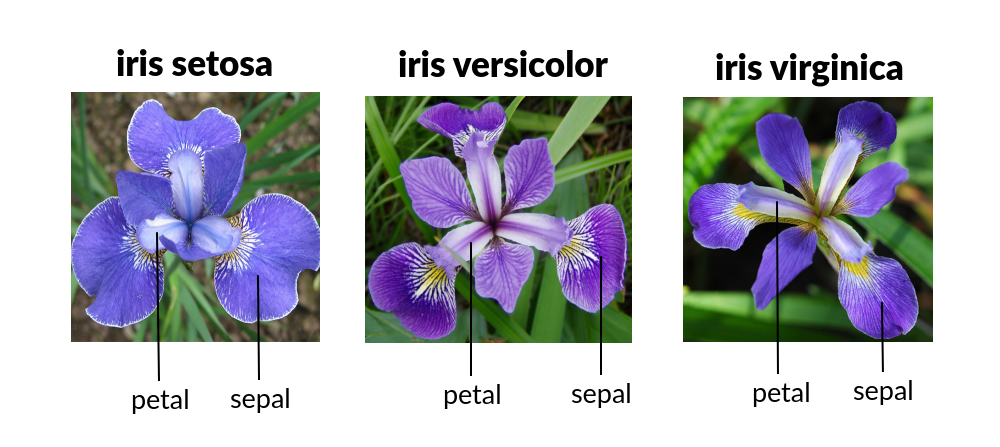

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

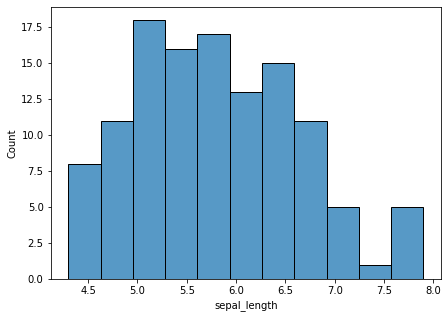

In [12]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='sepal_length', bins=11)

Vemos que la distribución de esta variable no es exactamente normal, pero tiene una forma de campana con una cola pesada. Vemos que la mayoría de los valores se encuentran entre 5 y 6.5

#### sepal_width

Veamos ahora como se comporta la variable sepal_width. Veremos en el gráfico debajo que esta variable tiene un comportamiento mucho más similar a una distribución normal.

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

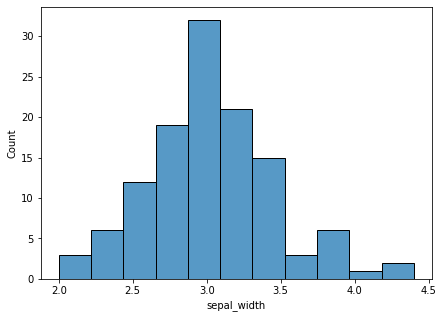

In [13]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='sepal_width', bins=11)

#### petal_length

Veamos ahora cómo se comporta la variable petal_length. Esta variable también tiene un componente bastante frecuente en algunas distribuciones, y es que tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal. Veremos al final cómo podemos solucionarlo aplicando una transformación logarítmica.

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

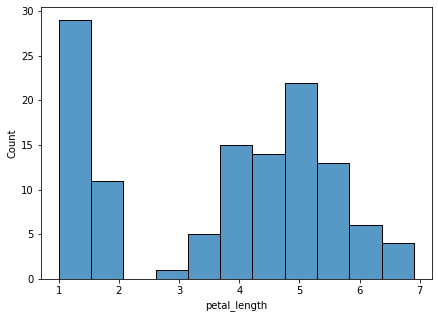

In [14]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='petal_length', bins=11)

#### petal_width

Veamos ahora cómo se comporta la variable petal_width. Esta variable también tiene un componente bastante frecuente en algunas distribuciones, y es que tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal. Veremos al final cómo podemos solucionarlo aplicando una transformación logarítmica, aunque probablemente no funcione tan bien como en petal_length

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

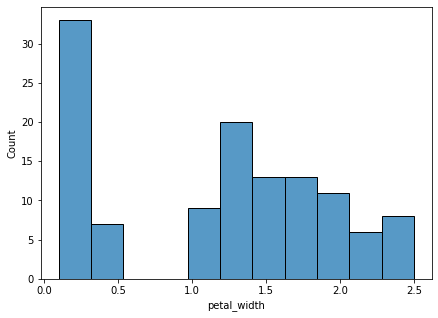

In [15]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='petal_width', bins=11)

#### species

Llegamos al análisis más importante de este proceso, el análisis de la clase que queremos intentar predecir. El objetivo de este problema es predecir el tipo de flor en función de las 4 variables que acabamos de estudiar, así que un buen punto de partida será ver cómo se distribuye la variable.

Lo primero que debemos pensar es qué tipo de variable es esta? Es una variable **categórica**, por lo que no podemos hacer un histograma como en los casos anteriores. La forma más sencilla de mostrar la distribución de una variable categórica es por **conteo**, por lo que utilizaremos un countplot de Seaborn..

<AxesSubplot:xlabel='species', ylabel='count'>

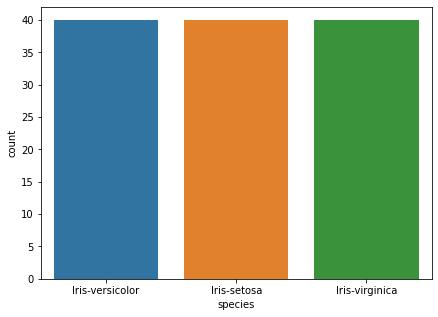

In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_train, x='species')

Pareciera que todas las clases tienen la misma representación, que es el caso ideal. En el caso de clases desbalanceadas, tenemos que ver cómo podemos rebalancear las clases para que nuestro modelo pueda aprender suficiente de cada clase y no priorizar una sobre otra, o incluso predecir siempre una si el desbalance es muy grande. Este [articulo](https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html) tiene algunos métodos que podemos aplicar para rebalancear las clases, básicamente basados en los métodos estadísticos de oversampling y undersampling. Aunque también han surgido métodos más avanzados que introducen pequeñas perturbaciones a los datos para generar nuevos registros que no estén en los datos per se.

Igualmente, como el gráfico puede ser engañoso,haremos una pequeña verificación solo para asegurarnos de la distribución.

In [17]:
df_train['species'].value_counts()

Iris-versicolor    40
Iris-setosa        40
Iris-virginica     40
Name: species, dtype: int64

## Análisis Bivariante

Luego de ver como se comportan los datos por sí mismos, nos interesa ver cómo se comportan los datos en relación a los demás. Como las 4 variables independientes son numéricas, podemos utilizar un truco para graficar rápidamente las relaciones entre todas ellas utilizando un **pairplot** de Seaborn. En la práctica si hay muchas variables es posible que antes tengamos que hacer un estudio de correlación o algo que nos permita quitarnos algunas variables del medio, y solo analizar las variables relevantes y/o correladas.

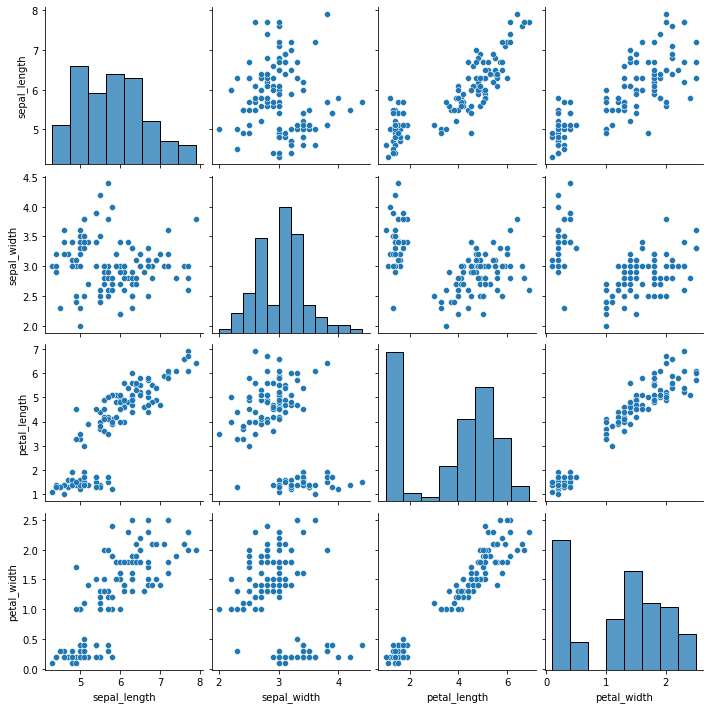

In [18]:
sns.pairplot(df_train)

Vemos que las variables petal_length y petal_width están bastante correladas, y lo mismo se ve para petal_length y sepal_length.

## Análisis Multivariable

Finalmente, podemos introducir una variable más a este proceso, que será la variable a predecir "species". Podemos hacerlo introduciendo un hue en el pairplot para ver si podemos visualizar rápidamente alguna frontera de separación entre las 3 especies de flores.

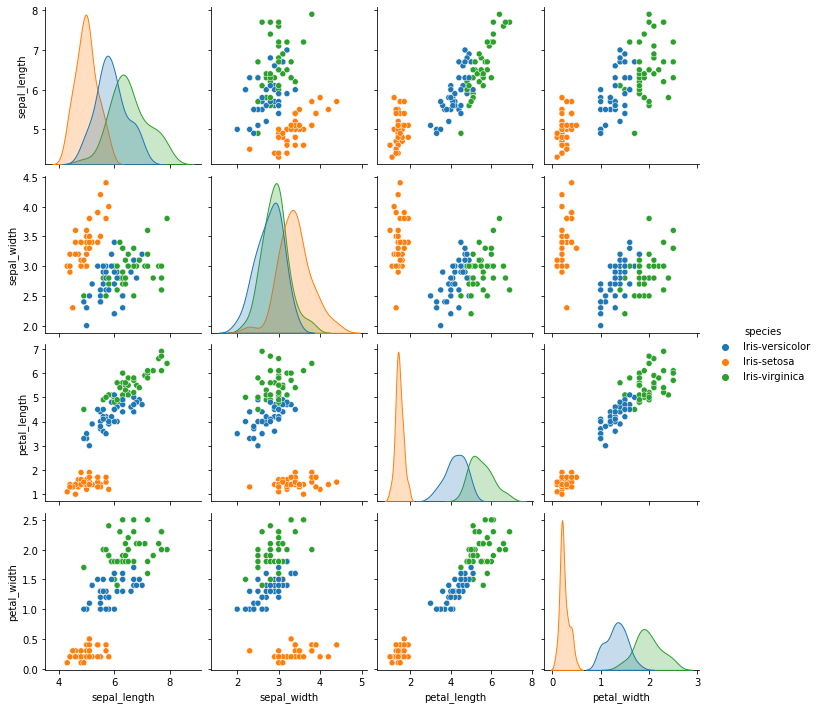

In [19]:
sns.pairplot(df_train, hue='species')

El gráfico que se muestra encima es muy informativo. Vemos que claramente existe una frontera de separación entre los datos, por lo que es probable que nuestro problema sea capaz de resolverlo de forma analítica y llegando a un buen resultado.

## Análisis de correlación

Este análisis siempre es muy importante en las variables numéricas, y sobre todo en los modelos lineales (aunque debemos revisarlo siempre). La multicolinearidad es un gran problema en el cálculo matricial, por lo que debemos evitar a toda costa variables con correlación alta, porque significa que están introduciendo problemas al modelo que luego entrenaremos para resolver el problema.

Algunos errores comunes que se cometen en el análisis de correlación:

- Incluir variables categóricas: Como vimos en el módulo de [estadística](https://www.kaggle.com/code/micheldc55/introducci-n-a-estad-stica-para-data-science) la correlación (de Pearson) se calcula como el ratio entre la covarianza entre dos variables y la raíz del producto de sus varianzas. Esto significa que las variables que utilicemos en el análisis de correlación deberán ser continuas.
- No definir la escala correcta: La correlación está entre 0 y 1, pero muchas veces cuando graficamos veremos que la escala de colores se ajusta al valor mínimo y máximo de nuestra escala. Es muy poco probable tener dos variables que tengan correlación 0 y 1, y por lo tanto la escala variará entre estos dos valores y no entre 0 y 1, esto nos puede sesgar a pensar que una diferencia entre dos valores es mayor de lo que es en realidad. Para solucionar esto se suelen imponer los valores máximos y mínimos del mapa de calor.
- Tomar correlación "buena" o "mala" basado en un número arbitrario: Muchas veces veremos declaraciones como "correlación por encima de 0.7 es muy alta" o lo contrario. En la realidad debemos apoyarnos en el gráfico y el valor de la correlación a la vez para poder tomar una decisión más acertada.
- No graficar los valores de la correlación sobre los gráficos en el heatmap: Los valores ayudar a resolver esas diferencias en las que no estamos seguros de si lo que vemos es una correlación muy alta o regular. Para esto le pasaremos al heatmap el parámetro annot=True

<AxesSubplot:>

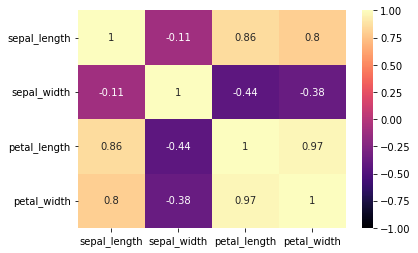

In [20]:
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, cmap='magma', annot=True)

Se ve claramente que la correlación entre petal_length y sepal_length y la de petal_length y petal_width es alta, como habíamos visto en los demás análisis. Esto confirma nuestra teoría. Veamos que pasa con la escala si no aclaramos los valores de vmax y vmin...

<AxesSubplot:>

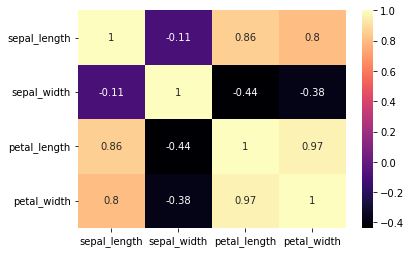

In [21]:
sns.heatmap(df_train.corr(), cmap='magma', annot=True)

Vemos que los colores son más intensos porque la escala es más acotada, por lo que el cambio pequeño afecta bastante a la percepción de la diferencia entre los valores de correlación.

## Presentando un modelo

Aún no hemos resuelto el problema de valores numéricos. La clase que queremos predecir tiene valores en texto, y aunque algunos modelos de ML lo permiten, generalmente lo ideal es convertir todas las variables a valores numéricos para aprovechar la computación vectorizada de NumPy. Así que debajo convertimos rápidamente los valores de las 3 clases a números.

In [22]:
df_train['species'].unique()

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [23]:
map_target_class = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

df_train['species_numerical'] = df_train['species'].map(map_target_class)
df_test['species_numerical'] = df_test['species'].map(map_target_class)

df_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_numerical
63,6.1,2.9,4.7,1.4,Iris-versicolor,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [25]:
X_train = df_train.drop(['species', 'species_numerical'], axis=1)
y_train = df_train['species_numerical']
X_test  = df_test.drop(['species', 'species_numerical'], axis=1)
y_test  = df_test['species_numerical']

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [27]:
lr = LogisticRegression(random_state=101, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=101)

In [28]:
preds_train = lr.predict(X_train)
print(confusion_matrix(y_train, preds_train))
print(classification_report(y_train, preds_train))

[[40  0  0]
 [ 0 37  3]
 [ 0  1 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        40
           2       0.93      0.97      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



Vemos que la precisión del resultado es **altísima**. Esto es razonable porque ya habíamos visto que es posible obtener una frontera de separación bastante buena simplemente con mirar el problema, por lo que era bastante probable que nuestro algoritmo (a pesar de que aún no sabemos cómo funciona) fuera capaz de devolver un resultado muy bueno.

La pregunta que debemos hacernos es... **¿Hemos terminado?**

Podríamos ver ese resultado y pensar que si, hemos conseguido una precisión muy alta en nuestro modelo, ya está listo para poner en marcha! La verdad es que no, porque sólo hemos validado con el conjunto con el que hemos entrenado el modelo. Luego veremos más adelante los riesgos del overfitting, pero lo importante es entender que no hemos medido cómo es el desempeño de nuestro modelo con nuevos datos!

Veamos cómo podemos hacer eso debajo...

In [29]:
preds = lr.predict(X_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Oficialmente vemos que nuestro modelo es igual de bueno con datos que jamás ha visto. Por lo que podemos decir que el modelo parece generalizar bien en nuestro dataset. Es importante aclarar que nuestra muestra total es bastante reducida, así que igualmente si esto fuera la vida real seguramente deberíamos probar en otros conjuntos o intentar conseguir más datos para poder dar una apreciación de mayor seguridad.

# Uso de otros recursos

En este proceso vimos algunos recursos de los más típicos para hacer Análisis Exploratorio de Datos, pero hemos visto en la introducción otros recursos que no pudimos mostrar para este dataset. Debajo se detallan algunos de estos procesos para que podamos ver algunas formas de resolverlos.

## Cómo tratar los valores nulos

El manejo de valores nulos suele ser objeto de muchos tutoriales en internet, pero es importante aclarar un par de detalles sobre este proceso. Tenemos dos grandes maneras de lidiar con valores nulos:
- **Eliminando registros:** En este caso tomamos como que la información en los nulos no es relevante para el problema o no podemos ofrecer información útil al modelo si ese valor es nulo, por lo que lo eliminamos. Podemos hacerlo a nivel de registro (eliminando filas que tengan nulos) o a nivel de columna si vemos que una columna tiene una cantidad desproporcionada de valores nulos. Este método tiene una gran desventaja y es que perdemos una fila entera de registros o una columna entera (estamos perdiendo información). Pero tiene una gran ventaja y es que no nos estamos inventando los valores de los registros.

- **Imputando registros:** En este caso haremos lo contrario, suponemos que no queremos perder la información contenida dentro de los registros que contienen valores nulos y decidimos **imputar** un valor al valor nulo, utilizando algún criterio de los que veremos a continuación.
    - **Imputando por algún valor de tendencia central:** El más común es la media o la mediana. Básicamente podemos imputarle el valor medio de la columna a todos los valores nulos de esa columna. Incluso podríamos agrupar por categorías y afinar aún más el valor medio por categoría para imputar. Si quieren ver un ejemplo práctico de esto, pueden verlo [aqui](https://www.kaggle.com/code/micheldc55/tutorial-data-science-matplotlib-y-seaborn).
    - **Imputando con una categoría "unknown":** Muchas veces, cuando tenemos nulos en variables categóricas, una buena opción es imputarle a los nulos de la categoría una "nueva categoría", que podría ser "desconocido", "unkown", etc. La ventaja de esto es que no nos estamos inventando valores, pero la desventaja es que estamos aumentando la dimensionalidad del problema, porque estamos agregando un nuevo valor para el que el modelo deberá aprender su comportamiento.
    - **Imputando un valor conocido:** Esto no es muy frecuente en problemas de Kaggle porque no tenemos conocimiento real del problema, pero en la práctica es posible que podamos solucionar el problema si entendemos por qué se genera ese nulo. Imaginemos que cuando los usuarios ingresan 0 en una variable, por algún problema interno el sistema no procesa este valor y devuelve un valor nulo. Si nosotros supiéramos esto podríamos corregirlo y además tener el valor real que debería ir en esa posición.
    - **Imputando con algún modelo de ML:** Esto suena un poco a resolver Machine Learning con Machine Learning y lo es un poco. En este caso supongamos que tenemos dos columnas en las que detectamos nulos. Lo que haremos será generarnos un modelo que intente predecir el valor de ese nulo en función de los valores de los demás registros que no tienen un nulo en esa posición. **Cuidado!** En este proceso no debemos utilizar la variable objetivo, ya que podríamos incurrir en Data Leakage si después utilizamos los valores predichos para el nulo para predecir la variable. Sklearn tiene un modelo dentro del módulo **impute** para esto, llamado **IterativeImputer**. También nos proveen una clase para cuando queremos rellenar nulos con un valor como la mediana o una constante, llamdo SimpleImputer, pero éste último prefiero hacerlo con el método de pandas .fillna().
    
```python
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer = IterativeImputer()
imputed_df = imputer.fit_tranform(df)
```

Y aunque estoy de acuerdo en que es un proceso de suma importancia, también me parece muy importante aclarar que siempre que imputemos valores nulos estamos **inventado valores**. Obviamente estamos inventando valores tomando una decisión informada con datos, pero generalmente, salvo que quien creó el dataset nos lo diga directamente, nunca sabremos si esos valores nulos están bien imputados o no. Por lo tanto, es un proceso que hay que hacer con **mucho cuidado**.

### Fabricando un ejemplo

Debajo fabricaremos un ejemplo para poder imputar los nulos. Quitaremos 15 valores al azar de 2 columnas y mostraremos cómo podríamos implementar las distintas soluciones que hemos planteado. También tomaremos el ejemplo como oportunidad para discutir las ventajas y desventajas de cada método en cada caso. Veremos:

- Cómo eliminar los datos de toda una columna
- Cómo eliminar las filas con datos faltantes
- Cómo imputar por alguna medida de tendencia central
- Cómo imputar con IterativeImputer

In [30]:
import random
indexes = random.sample(range(120), 15)

for index in indexes:
    if index > 80:
        df_train.iloc[index, 1] = np.nan
    else:
        df_train.iloc[index, 2] = np.nan
        
df_train.iloc[indexes]

,sepal_length,sepal_width,petal_length,petal_width,species,species_numerical
89,5.5,2.5,NaN,1.3,Iris-versicolor,1
5,5.4,NaN,1.7,0.4,Iris-setosa,0
87,6.3,NaN,4.4,1.3,Iris-versicolor,1
24,4.8,3.4,NaN,0.2,Iris-setosa,0
99,5.7,2.8,NaN,1.3,Iris-versicolor,1
61,5.9,NaN,4.2,1.5,Iris-versicolor,1
78,6.0,2.9,NaN,1.5,Iris-versicolor,1
15,5.7,4.4,NaN,0.4,Iris-setosa,0
71,6.1,NaN,4.0,1.3,Iris-versicolor,1
47,4.6,3.2,NaN,0.2,Iris-setosa,0


Debajo mostraremos cómo se implementa cada una de las soluciones:

#### Quitar las columnas que tienen nulos:

Como sabemos que las columnas sepal_width y petal_length son las que tienen, podemos simplemente eliminarlas del DataFrame usando el método .drop(). Notar el axis=1, ya que esto es un error común. En la práctica podemos ver qué columnas tienen valores nulos utilizando el método .info() del DataFrame. 

Éste método no suele ser recomendable cuando hay pocos datos faltantes. Incluso en el caso que tiene más nulos, solamente son 11, por lo que no nos compensa eliminar una columna entera por eso.
```python
df_train.info()
df_train.drop(['sepal_width', 'petal_length'], axis=1)
```
#### Quitar los registros que tienen nulos:

Una opción más razonable podría ser eliminar las filas que en alguno de sus elementos tienen valores nulos. Esto suele ser más razonable porque no necesitamos perder una columna entera, que suele contener más información que una fila. Si la proporción de registros a perder es baja, esto puede ser una buena opción, porque no estamos perdiendo un porcentaje grande del dataset. El problema es que este dataset tiene 150 registros, por lo que no queremos perder ninguno. En este caso, no sería recomendable eliminarlos.
```python
# En este caso no necesitamos el axis=1
df_train.dropna(subset=['sepal_width', 'petal_length'])
```

#### Imputar por la media de la columna:

Ahora si comenzamos con los casos que si pueden ser más riesgosos para el aprendizaje del modelo. Básicamente ahora podemos también imputar los valores de la columna con la media de la columna (o la mediana, o la moda o cualquier estadístico de tendencia central). En este caso, nos estamos inventando información y además ya hemos visto que los valores son muy dependientes a las "especies". **Pregunta al lector:** ¿Por que entonces no rellenamos con la media de la columna, pero agrupada por especie? Pueden dejar su opinión en los comentarios.

```python
media_sepal = df_train['sepal_width'].mean()
media_petal = df_train['petal_length'].mean()

df_train.loc[df_train['sepal_width'].isna(), 'sepal_width'] = media_sepal
df_train.loc[df_train['petal_length'].isna(), 'petal_length'] = media_petal
```

#### Imputar con IterativeImputer:

Muchas veces, salvo que tengamos conocimiento muy profundo de producto, no podremos imputar estos nulos con la media o mediana, salvo que en el EDA veamos una relación muy clara de dependencia entre categorías y podamos agrupar por ellas. En casos de desesperación, podemos pedirle a sklearn que impute los valores nulos. Si les interesa saber cómo funciona esta herramienta de sklearn, pueden leerlo en detalle [aqui](https://towardsdatascience.com/a-better-way-to-handle-missing-values-in-your-dataset-using-iterativeimputer-9e6e84857d98#05b9).

En pocas palabras, lo que hace este proceso es comenzar seleccionando las columnas en base a un orden establecido, que es un input de la clase (por defecto ascendente, de la columan que tiene menos nulos a la que tiene más). Luego, se sustituya en la primera columna los nulos por la media de la columna. Luego el proceso iterativo entrena un modelo de ML (que podemos elegir) con todos los demás registros e imputa la predicción del modelo, y lo hace para cada uno de los features. Esto sigue hasta que se cumpla el número de iteraciones o se verifique una cierta condición, que se explica en el artículo. Para usar este modelo solo debemos:

```python
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
imputer.fit_transform(df_train)
```


## Caso especial de reducción de dimensionalidad: PCA

### Qué es la reducción de la dimensionalidad?

Muchas veces pensamos que cuanta más imformación le demos al modelo, mejor funcionará, pero este pensamiento suele ser problemático. Imaginemos que tenemos datos como los que se ven en el diagrama debajo. Cuantas variables estamos graficando en este caso? Veremos que en este ejemplo claramente sobran 2 variables, y esto es porque nuestro problema parece tener dependencia lineal con la variable sobre la que está definido el plano. Básicamente podemos convertir esta problema en un problema de 2 dimensiones sin perder 

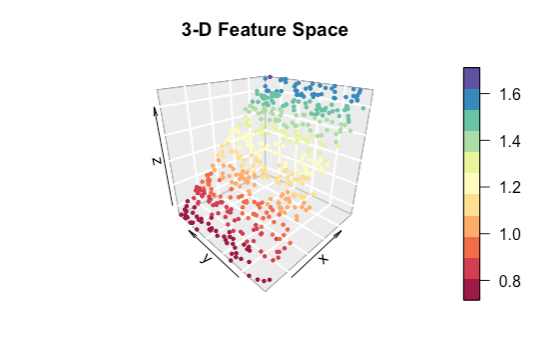

Generalmente, veremos que intentaremos reducir la dimensionalidad del problema principalmente para solucionar dos problemas, uno de separabilidad de variables y/o visualización, y otro de computación. Cuando reducimos la dimensionalidad del problema podemos llegar a reducirlo a 2 o 3 variables y por lo tanto podremos **visualizar** el problema. Esto es clave, porque muchas veces veremos que un problema de varias dimensiones se puede reducir a 2 o 3 y conservar gran parte de la separación de las clases del problema. Esto nos permitirá visualimente entender nuestro problema entero, como una representación de 2 o 3 variables, en lugar de 10 (por ejemplo). 

El otro problema es de poder de cómputo, tanto del entrenamiento del modelo como de su puesta en producción. Si tenemos un modelo que tiene 20 variables para predecir una, el modelo se está entrenando recibiendo instancias de 20 elementos y llevando a cabo las operaciones que correspondan según el modelo que sea. Esto implica que el modelo deberá entrenarse en N x m dimensiones, donde N es la cantidad de registros y m la cantidad de variables (en este caso 10). Si utilizamos técnicas de reducción de dimensionalidad y llevamos el problema a uno de N x m', donde m' es la cantidad de variables reducida (generalmente 2 o a lo sumo 3), hemos reducido la cantidad de instancias que el modelo debe calcular en m'/m. Esto hace que nuestro problema sea más eficiente en términos de coste computacional (necesita menos poder de procesamiento para entrenarse).

En este proceso se identifican y eliminan las variables irrelevantes (o poco relevantes), reduciendo el ruido del dataset original. El mejor modelo que podemos alcanzar no es el que tiene en cuenta más variables, sino aquel que incluye la mayor cantidad de información de calidad.

### Técnicas de reducción de dimensionalidad:

Selección de variables: filtrar las variables de baja varianza, pruebas estadísticas univariadas (pruebas de dependencia), eliminación de características de forma recursiva, random forests, ratio de valores faltantes, filtrar aquellas variables de alta correlación, etc.

#### Técnicas matemáticas de reducción de dimensionalidad:

A pesar de poder reducir la dimensionalidad quitando o agregando columnas, muchas veces nuestras variables aportan poca información pero nos interesa contemplarlas. Para esto también existen técnicas que nos permiten tomar nuestro espacio de variables y convertirlo a un subespacio de componentes que intentan mantener alguna propiedad del espacio inicial. Esto puede ser la varianza, la distancia punto a punto, etc. Si les interesa [aqui](https://hmong.es/wiki/Nonlinear_dimensionality_reduction) se resumen la mayoría de los modelos (y en español).

- Lineal: análisis factorial, análisis de componentes principales (PCA), análisis de discriminante lineal.

- No lineal: escala multidimensional, t-SNE, mapeo de características isométricas (ISOMAP), aproximación y proyección de colector uniforme (UMAP)

Veamos cómo sería la aplicación de un método lineal, como el PCA para este caso. Tenemos 4 variables, por lo que no podemos visualizar directamente las 4 variables para identificar posibles patrones entre todas ellas. Intentaremos utilizar la técnica de Análisis de Componentes Principales para obtener una proyección en 2 componentes que intentan capturar la mayor parte de la varianza de las 4 variables iniciales.

El PCA utiliza los valores propios de la matriz que pasamos como input, y crea su descomposición en vectores propios. Cuando seleccionamos el número de variables que queremos tener en cuenta (n_components=2 en este caso) estamos diciéndole al modelo que queremos conservar los dos primeros vectores propios y proyectar nuestros datos (de 4 dimensiones) en estas dos direcciones. Esto

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72646491 0.23006439]
0.9565292921584864


Vemos que el 96% de la varianza del problema puede ser explicado por estas dos nuevas variables que son combinación lineal de las 4 variables del problema.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

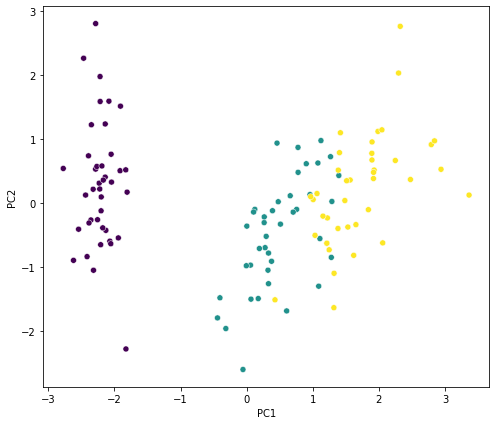

In [33]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y_train

plt.figure(figsize=(8, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', c=y_train, palette='tab10')

Vemos una clara separación entre los 3 clusters incluso habiendo reducido el problema a dos variables. Se puede aproximar incluso más utilizando otras técnicas, pero con estas nuevas variables ya podríamos hacer un modelo y compararlo con el anterior! Debajo vemos la comparativa y los resultados son muy buenos. Pensar que estamos perdiendo la mitad de los datos y aún así estamos conservando un score muy alto!

In [34]:
lr = LogisticRegression(random_state=101, max_iter=1000)
lr.fit(X_pca, y_train)
train_preds = lr.predict(X_pca)
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.87      0.85      0.86        40
           2       0.85      0.88      0.86        40

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



In [35]:
X_test_pca = pca.transform(X_test)

test_predictions = lr.predict(X_test_pca)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



#### Veamos qué sucede con la varianza explicada a medida que aumenta la cantidad de variables que utilizamos...

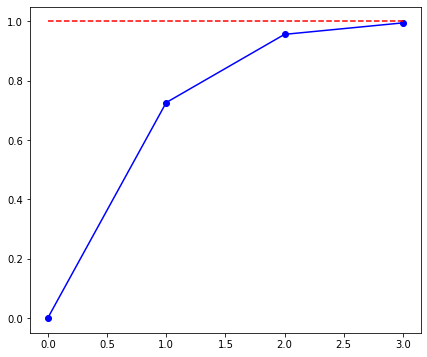

In [36]:
expl_var = [0]

for n_components in [1, 2, 3]:
    var_pca = PCA(n_components=n_components)
    X_pca_n = var_pca.fit_transform(X_train)
    expl_var.append(sum(var_pca.explained_variance_ratio_))
    
plt.figure(figsize=(7, 6))
plt.plot([0, 1, 2, 3], expl_var, 'bo-')
plt.plot([0, 3], [1, 1], 'r--')

# Ejercicio

Utilizando el dataset de [PUBG (videojuego online de disparos)](https://www.kaggle.com/competitions/pubg-finish-placement-prediction/data), realizar un EDA (en otro notebook). Seguir los siguientes pasos:
- Elegir 7 variables de interés y filtrar el dataframe
- Utilizar el método describe e info para generar una idea general de los datos
- Hay valores nulos? Si hay, qué haría con ellos?
- Hay valores duplicados? Si hay, tienen sentido o sería más razonable eliminarlos?
- Visualizar las 7 variables en distribución o conteos, alguna cosa llama la atención?
- Realizar el análisis bivariable para las variables numéricas.
- Elegir 3 variables y visualizarlas en un único gráfico
- Estudiar la correlación entre variables. Defender si es razonable quitar alguna variable